<a href="https://colab.research.google.com/github/lapnguyen331/machine_leaning_lab/blob/main/Lab_10_21130419_NguyenHoangLap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets

#model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

#đánh giá
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#clusting
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#load data
iris = datasets.load_iris()
x1=iris['data']
y1=iris['target']

In [ ]:
scoring = {'acc': 'accuracy',
'prec_macro': 'precision_macro',
'rec_micro': 'recall_macro'}

In [ ]:
model1 = svm.SVC(kernel='linear', C=1, random_state=42)
score1 = cross_validate(model1,x1,y1,scoring= 'accuracy',cv=10)
print(sorted(score1.keys()))
print(np.mean(score1['test_score']))


['fit_time', 'score_time', 'test_score']
0.9733333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [ ]:
#feartur selection
model1_2=RandomForestClassifier(n_estimators=100)
model1_2.fit(x1,y1)


RandomForestClassifier()

In [ ]:
#xem mức độ quan trọng của fearture
feature_imp = pd.Series(model1_2.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.473544
petal width (cm)     0.408050
sepal length (cm)    0.089760
sepal width (cm)     0.028647
dtype: float64

In [ ]:
features = feature_imp.index[0:2].values
x_new = x1

*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [ ]:
new_model1 = RandomForestClassifier(n_estimators=100)


In [ ]:
svm_score = cross_validate(model1, x1, y1, scoring=scoring,
cv=5, return_train_score=True)
rf_score = cross_validate(new_model1, x1, y1, scoring=scoring,
cv=5, return_train_score=True)

In [ ]:
print(svm_score.keys())
# print(svm_score)

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])


In [ ]:
#code
from prettytable import PrettyTable

table1  = PrettyTable(['Algo',svm_score.keys()])
table1.add_row(['svm',svm_score])
table1.add_row(['random forest',rf_score])
print(table1)


+---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      Algo     |                                                                                                                                                                                                                                                                                dict_keys([

#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [ ]:
#load data
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/machine_learning/lab10'

Mounted at /content/gdrive
/content/gdrive/MyDrive/machine_learning/lab10


In [ ]:
data2= pd.read_csv('fashion_train.csv')
X_train2 = data2.iloc[:,:784]
y_train2 = data2.iloc[:,-1]

In [ ]:
# code
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(data2)
clusters = kmeans.predict(data2)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 785)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [ ]:
def getMetrics(model,x_train,y_train):
  score2 = cross_validate(model,x_train,y_train,scoring= 'accuracy',cv=10)
  return (np.mean(score1['test_score']))

In [ ]:
#
rf_model2=RandomForestClassifier(n_estimators=100)
svm_model2 = svm.SVC(kernel='linear', C=1, random_state=42)


In [ ]:
# rf_model2.fit(X_train2,y_train2)
# svm_model2.fit(X_train2,y_train2)
rf_acu = getMetrics(rf_model2,X_train2,y_train2)
svm_acu = getMetrics(svm_model2,X_train2,y_train2)

In [ ]:
table2  = PrettyTable(['Algo',svm_score.keys()])
table2.add_row(['svm',svm_acu])
table2.add_row(['random forest',rf_acu])
table2.add_row(['kmean',rf_acu])

print(table2)

+---------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|      Algo     | dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro']) |
+---------------+--------------------------------------------------------------------------------------------------------------------------------------------+
|      svm      |                                                             0.9733333333333334                                                             |
| random forest |                                                             0.9733333333333334                                                             |
|     kmean     |                                                             0.9733333333333334                                                             |
+---------------+-----------------------------

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [ ]:
#code
cluster2 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster2.fit_predict(X_train2)
cluster2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 7, 2, 0, 6, 3, 2, 2, 7, 1, 2, 3, 4, 1, 8, 0, 1, 0, 0, 7, 2, 6,
       0, 0, 6, 5, 4, 7, 4, 6, 6, 1, 0, 2, 0, 0, 9, 0, 1, 5, 2, 3, 2, 6,
       1, 0, 9, 5, 1, 4, 0, 7, 7, 5, 3, 4, 1, 9, 0, 0, 1, 3, 3, 4, 6, 2,
       4, 1, 3, 6, 7, 1, 4, 3, 7, 6, 3, 4, 4, 2, 1, 3, 4, 0, 0, 9, 6, 0,
       7, 2, 8, 4, 7, 1, 2, 2, 1, 1, 4, 6, 6, 0, 3, 1, 8, 0, 2, 4, 0, 2,
       3, 4, 2, 1, 8, 1, 1, 8, 2, 2, 0, 1, 3, 6, 6, 5, 8, 1, 9, 0, 7, 4,
       0, 1, 2, 4, 6, 2, 6, 6, 2, 0, 6, 4, 6, 8, 4, 4, 0, 1, 1, 1, 1, 1,
       2, 3, 5, 0, 5, 9, 3, 3, 6, 8, 6, 8, 2, 6, 4, 7, 1, 0, 3, 7, 2, 6,
       4, 4, 3, 7, 1, 0, 0, 2, 6, 4, 0, 2, 8, 3, 1, 4, 8, 3, 5, 0, 6, 1,
       2, 0, 6, 4, 6, 6, 3, 8, 2, 4, 8, 2, 3, 0, 1, 6, 3, 6, 8, 0, 4, 6,
       0, 5, 5, 6, 6, 6, 2, 1, 4, 8, 1, 0, 0, 6, 5, 6, 8, 5, 6, 7, 3, 5,
       1, 2, 4, 4, 3, 6, 1, 0, 0, 6, 3, 6, 4, 3, 4, 2, 3, 4, 0, 0, 4, 1,
       4, 4, 8, 6, 3, 4, 1, 2, 6, 5, 2, 1, 8, 3, 5, 2, 0, 1, 2, 0, 1, 6,
       4, 2, 6, 4, 1, 1, 3, 0, 4, 8, 0, 1, 1, 8, 0,

#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code
data3 = pd.read_csv('shopping-data.csv')


In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import seaborn as sns
data3_1 = data3.drop(['CustomerID', 'Genre'], axis=1)


In [ ]:
# Compute pairwise distance matrix
distance_matrix = hierarchy.distance.pdist(data3_1)
# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='ward')

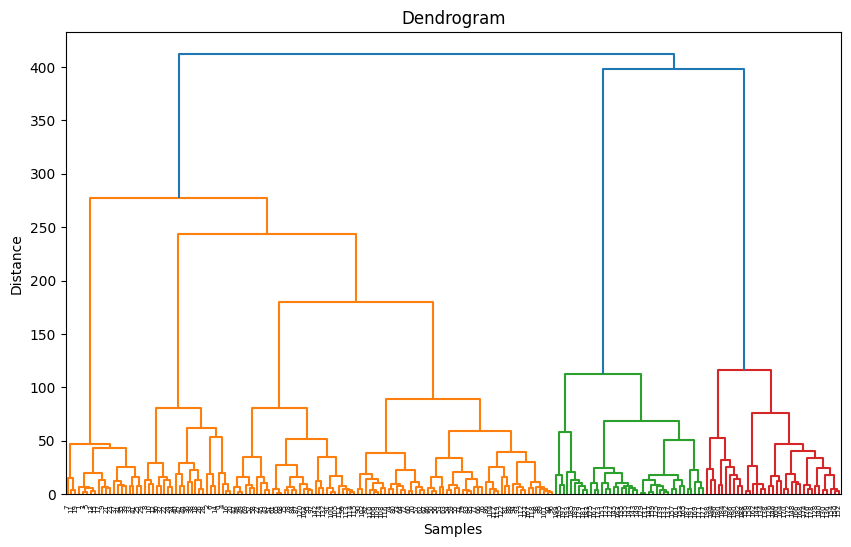

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=data3.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code
k_range = range(2, 11)
sse_values = []
for k in k_range:
  scaler3 = StandardScaler()  # Create a scaler object inside the loop
  scaled_data3 = scaler3.fit_transform(data3_1)
  # Initialize KMeans model
  kmeans = KMeans(n_clusters=k, random_state=0)  # Set random state for reproducibility

  # Fit the model to the data (use scaled data if normalization is applied)
  kmeans.fit(scaled_data3)

  # Calculate and store SSE
  sse = kmeans.inertia_
  sse_values.append(sse)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

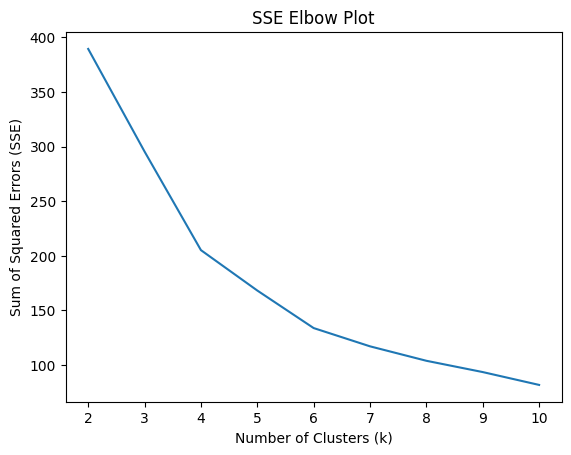

In [ ]:
plt.plot(k_range, sse_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("SSE Elbow Plot")
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data3_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

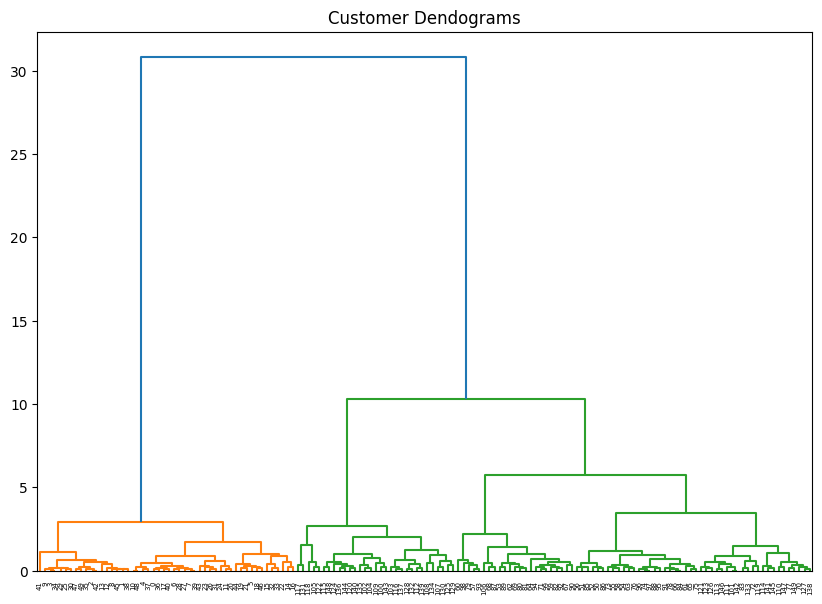

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(iris.data[:, 1:4], method='ward'))

#Finally,
Save a copy in your Github. Remember renaming the notebook.